# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df_depurado = df[['Latitude', 'Longitude', 'MedInc']]
df_depurado.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_depurado, test_size=0.2, random_state=42)


In [7]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=6,n_init='auto' ,random_state=42)
model_kmeans.fit(X_train)


,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [14]:
model_kmeans.labels_

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [15]:
y_train = list(model_kmeans.labels_)
X_train['clusters'] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster,clusters
14196,32.71,-117.03,3.2596,3,3
8267,33.77,-118.16,3.8125,1,1
17445,34.66,-120.48,4.1563,1,1
14265,32.69,-117.11,1.9425,3,3
2271,36.78,-119.80,3.5542,5,5


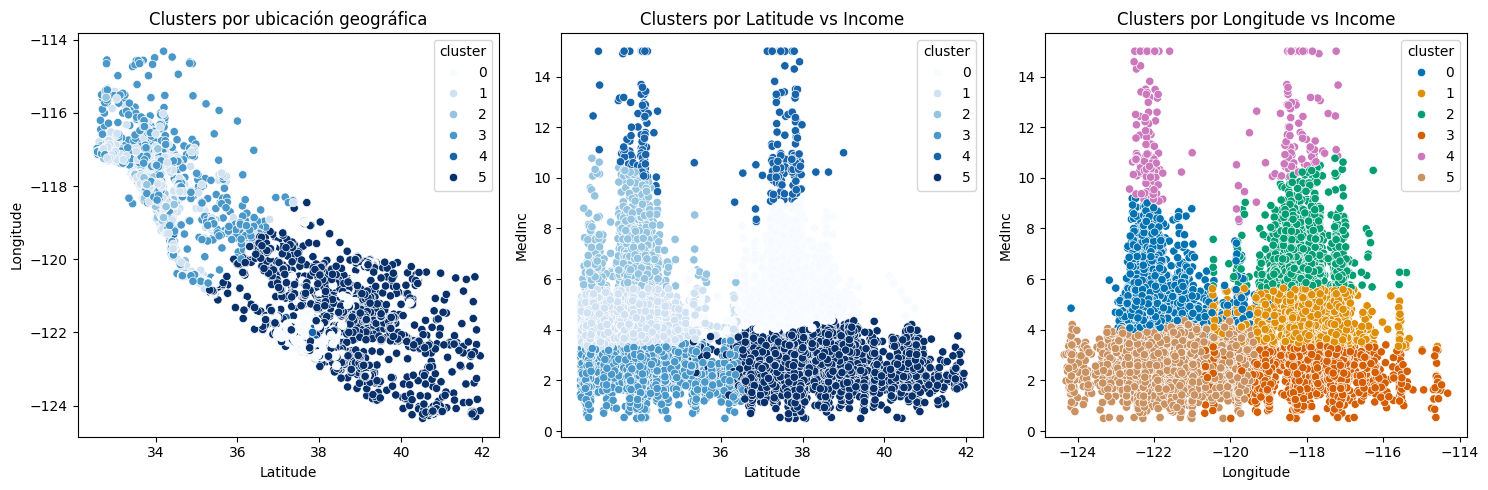

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con tres subplots en una fila
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Primer gráfico: Latitude vs Longitude
sns.scatterplot(
    data=X_train,
    x='Latitude',
    y='Longitude',
    hue='cluster',
    palette='Blues',
    ax=axis[0]
)
axis[0].set_title('Clusters por ubicación geográfica')
axis[0].set_xlabel('Latitude')
axis[0].set_ylabel('Longitude')

# Segundo gráfico: Latitude vs Median Income
sns.scatterplot(
    data=X_train,
    x='Latitude',
    y='MedInc',
    hue='cluster',
    palette='Blues',
    ax=axis[1]
)
axis[1].set_title('Clusters por Latitude vs Income')
axis[1].set_xlabel('Latitude')
axis[1].set_ylabel('MedInc')

# Tercer gráfico: Longitude vs Median Income
sns.scatterplot(
    data=X_train,
    x='Longitude',
    y='MedInc',
    hue='cluster',
    palette='colorblind',
    ax=axis[2]
)
axis[2].set_title('Clusters por Longitude vs Income')
axis[2].set_xlabel('Longitude')
axis[2].set_ylabel('MedInc')

# Ajuste de diseño
plt.tight_layout()
plt.show()


In [10]:
y_test = list(model_kmeans.predict(X_test))
X_test['clusters'] = y_test
X_test.head()

,Latitude,Longitude,MedInc,clusters
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


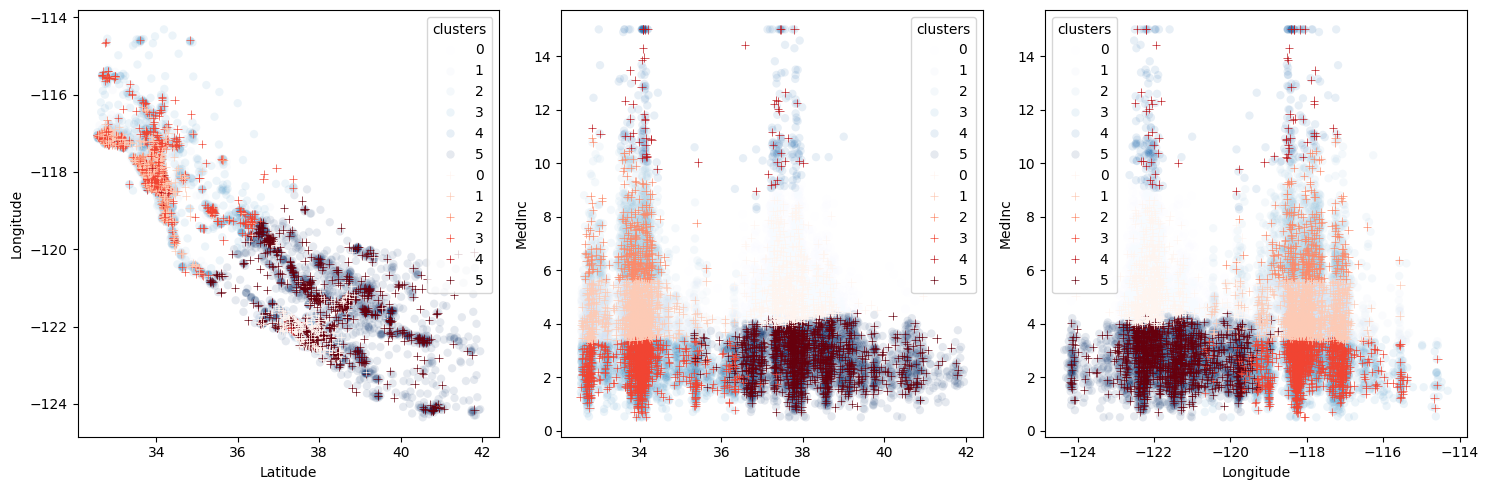

In [17]:
fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=X_train, x='Latitude', y = 'Longitude', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[1], data=X_train, x='Latitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[2], data=X_train, x='Longitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)

sns.scatterplot(ax = axis[0], data=X_test, x='Latitude', y = 'Longitude', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax = axis[1], data=X_test, x='Latitude', y = 'MedInc', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax = axis[2], data=X_test, x='Longitude', y = 'MedInc', hue='clusters', palette='Reds', marker='+')  

plt.tight_layout()
plt.show()


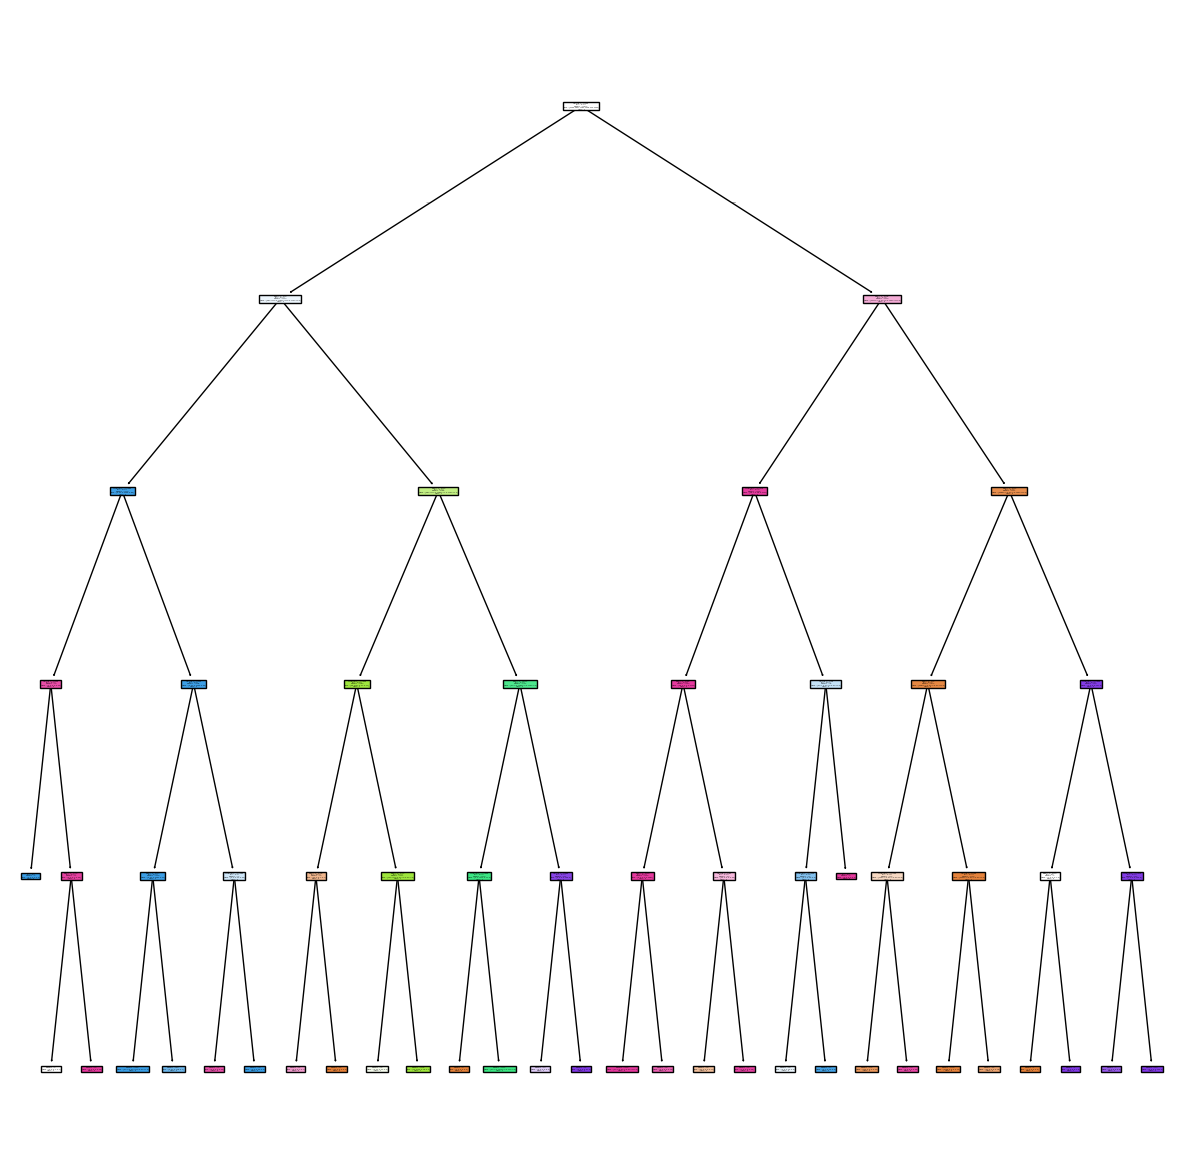

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train[['Latitude', 'Longitude', 'MedInc']], y_train)
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_model, filled=True, feature_names=['Latitude', 'Longitude', 'MedInc'], class_names=[str(i) for i in range(6)])
plt.show()

In [19]:
y_pred = tree_model.predict(X_test[['Latitude', 'Longitude', 'MedInc']])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.98


In [21]:
from pickle import dump
dump(model_kmeans, open('../models/kmeans_model.pkl', 'wb'))
dump(tree_model, open('../models/decision_tree_model.pkl', 'wb'))